# Dinesh Dhamodharan 

#Assesment 

In [123]:
pip install sweetviz

#importing packages

In [124]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport


import seaborn as sns
import sweetviz as sv
import matplotlib.pyplot as plt


from itertools import product
import scipy.stats as stats

from datetime import datetime
import warnings 
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Importing datasets

In [125]:
testSamples = pd.read_csv('testSamples.csv', index_col =0, header =0)

transData = pd.read_csv('transData.csv', index_col =0, header =0)
print (testSamples)
print (transData)

           test_group
sample_id            
1                   0
2                   1
3                   0
4                   1
5                   1
...               ...
59717               0
59718               0
59719               1
59720               0
59721               0

[59721 rows x 1 columns]
                sample_id transaction_type  transaction_amount
transaction_id                                                
52346326               11           REBILL               24.95
52346327               11           REBILL               24.95
52346328               32           REBILL               29.95
52346329               32           REBILL               29.95
52346330               32           REBILL               29.95
...                   ...              ...                 ...
52353751            59654           REBILL               39.95
52353752            59654           REBILL               39.95
52353753            59689           REBILL               2

In [126]:
Analyze_data = sv.analyze([df,"df"],target_feat= 'test_group')

                                             |          | [  0%]   00:00 -> (? left)

In [127]:
Analyze_data.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [128]:
testSamples.head(5)

,test_group
sample_id,
1,0
2,1
3,0
4,1
5,1


In [129]:
transData.head(5)

,sample_id,transaction_type,transaction_amount
transaction_id,,,
52346326,11,REBILL,24.95
52346327,11,REBILL,24.95
52346328,32,REBILL,29.95
52346329,32,REBILL,29.95
52346330,32,REBILL,29.95


In [130]:
df= pd.merge(transData, testSamples, on='sample_id')

In [131]:
df

,sample_id,transaction_type,transaction_amount,test_group
0,11,REBILL,24.95,1
1,11,REBILL,24.95,1
2,32,REBILL,29.95,1
3,32,REBILL,29.95,1
4,32,REBILL,29.95,1
...,...,...,...,...
7425,59654,REBILL,39.95,1
7426,59654,REBILL,39.95,1
7427,59689,REBILL,24.95,0
7428,59689,REBILL,24.95,0


In [132]:
df.dtypes

sample_id               int64
transaction_type       object
transaction_amount    float64
test_group              int64
dtype: object

In [133]:
df.head(10)

,sample_id,transaction_type,transaction_amount,test_group
0,11,REBILL,24.95,1
1,11,REBILL,24.95,1
2,32,REBILL,29.95,1
3,32,REBILL,29.95,1
4,32,REBILL,29.95,1
5,32,REBILL,29.95,1
6,103,REBILL,19.95,0
7,103,REBILL,19.95,0
8,103,REBILL,19.95,0
9,103,REBILL,19.95,0


# Exploratory data analysis

In [134]:
df.apply(lambda x: len(x.unique()))

sample_id             2714
transaction_type         3
transaction_amount      10
test_group               2
dtype: int64

In [135]:
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns 
                       if x not in ['Item_Identifier','Outlet_Identifier','source']]

In [136]:
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (df[col].value_counts() )


Frequency of Categories for varible transaction_type
REBILL        6961
REFUND         306
CHARGEBACK     163
Name: transaction_type, dtype: int64


In [137]:
df.apply(lambda x:sum(x.isnull()))

sample_id             0
transaction_type      0
transaction_amount    0
test_group            0
dtype: int64

#univariate analysis

Text(0.5, 1, 'test_group')

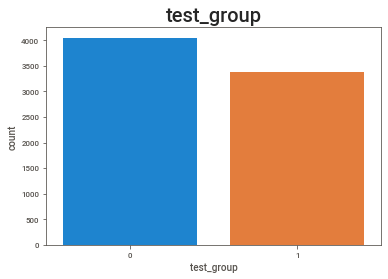

In [138]:
%matplotlib inline

sns.countplot(df['test_group'])
plt.title("test_group", y=1, fontdict={"fontsize": 20})

#**probablity distribution between test and control group**

Text(0.5, 1, 'transaction_type')

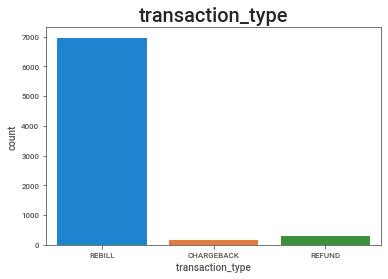

In [139]:
%matplotlib inline

sns.countplot(df['transaction_type'])
plt.title("transaction_type", y=1, fontdict={"fontsize": 20})

Text(0.5, 0, 'transaction_amount')

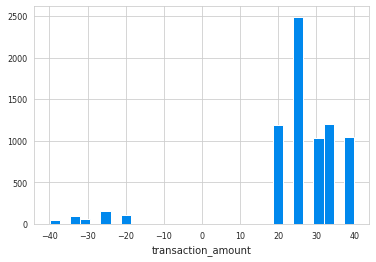

In [140]:
sns.set_style('whitegrid')
df['transaction_amount'].hist(bins=30)
plt.xlabel('transaction_amount')

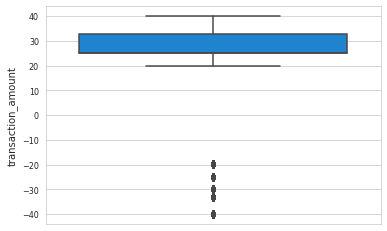

In [141]:
sns.boxplot( y=df['transaction_amount'] )

#---------------------------------------------------------------------------------------------------------------------------------------------

#---------------------------------------------------------------------------------------------------------------------------------------------

#---------------------------------------------------------------------------------------------------------------------------------------------

#Question-1  What is the aproximate probability distribution between the test group and the control group

# Cross Tabulation 

#to understand the bivariate analysis between the variables

In [142]:
data =df.transaction_type = df.transaction_type.map({
                        'REBILL':1,
                        'REFUND':2,
                        'CHARGEBACK':3
        })

In [143]:
contigency_table= pd.crosstab(df['test_group'],df['transaction_type'])
contigency_table

transaction_type,1,2,3
test_group,,,
0,3756,188,106
1,3205,118,57


In [144]:
pd.crosstab (index =df['test_group'],columns= df['transaction_type'], margins =True, normalize='index',dropna=True)

transaction_type,1,2,3
test_group,,,
0,0.927407,0.046420,0.026173
1,0.948225,0.034911,0.016864
All,0.936878,0.041184,0.021938


#**Chi Square Analysis**




In [145]:
from scipy.stats.contingency import chi2_contingency
chi_2, p_val, dof, exp_val = chi2_contingency(contigency_table)

print('Chi-square is %f'%chi_2, '\n\np_value is %f'%p_val, '\n\ndegree of freedom is %i'%dof)

if p_val < 0.05:
    print("\nThere is some relationship between the two variables at significance level 0.05")
else:
    print("\nThere is no relationship between the two variables")

Chi-square is 14.054759 

p_value is 0.000887 

degree of freedom is 2

There is some relationship between the two variables at significance level 0.05


# note - based on the above result i conclude:

1) probablity of a test group being chargeback and having control ground and test_group is 0.0219

2) where as the car having probablity of a test group being REFUND and having control ground and test_group is 0.0411


3) where as the car having probablity of a test group being REBILL and having control ground and test_group is par more highere than chargeback and rebill comparitively which is  0.9368

#when compared the two independent variables on chisquare it has evidently proven that there is a significance level at 0.05 and the p value is less than 0.05 ie 0.000887

#---------------------------------------------------------------------------------------------------------------------------------------------

#---------------------------------------------------------------------------------------------------------------------------------------------

##***Question-2  Is a user that must call-in to cancel more likely to generate at least 1 addition REBILL?***

Hypothesis -
 H0 - if p<0.05 reject 
 H0 - if p>0.05 not reject H0

H0 -  Is a user that must call-in to cancel more likely to generate at least 1 addition REBILL there is no association

H1 -  Is a user that must call-in to cancel more likely to generate at least 1 addition REBILL there is an association

In [146]:
crit =stats.chi2.ppf(q=0.95 , df =2)
print(crit)
print("critical value")


5.991464547107979
critical value


In [147]:
from collections import Counter


In [148]:
outcomes =''
for group in range(7430):
  group_outcomes = np.random.random() 
  if group_outcomes < .50:
    outcomes += '0'
  if group_outcomes > .50:
    outcomes += '1'


In [149]:
Counter(outcomes)

Counter({'0': 3786, '1': 3644})

In [150]:
outcomes

'011100111100000001001111000000011001011001101001111110111100000111100001000111001111110010010011010100011111001000010100101101000000111110000000111100001010100101100110100111001001111010111100111110011000111010101111100101011000111111101100011011011010100010001011110011110011110010101111011100111100000011010010111100011000010001001010010111011000000010001000111110110100111000110111100000001110111001000110110000000001110111100110011000111010000001000001001110100100111001001110111011001011100100001011011010110100011101010100110110101001011011001010010000000111010000100001000001000110110010111000001001101110110001000111011000101110111011000111110111010000001110100001110101001101011001001100100101110111010110001010110000000110000111000010000011011011001100000010001100110101101110010110000011110000000000110011010101011000100101100110000011111001111011011010100010011001101010011000111000111000011101111010010110100110000110000000100101111010010011000100111001001001000100011001101011000110010

# Note - Conclusion as per the above result.

1) customers are no needed to be called in to generate atleast one additional rebill, as we see in the above test result its proven that the customers who goes online has the same number of rebilling numbers, when its compared between test and control group. 

2) As I kept 0.5 that is 50 percent of data evenly in botht the group.

#---------------------------------------------------------------------------------------------------------------------------------------------

#---------------------------------------------------------------------------------------------------------------------------------------------

# Question -3. Is a user that must call-in to cancel more likely to generate more revenues?

In [151]:
pd.crosstab (index =df['test_group'],columns= df['transaction_amount'], margins =True, normalize='index',dropna=True)

transaction_amount,-39.95,-32.95,-29.95,-24.95,-19.95,19.95,24.95,29.95,32.95,39.95
test_group,,,,,,,,,,
0,0.000000,0.022222,0.000000,0.023951,0.026420,0.293580,0.337778,0.000000,0.296049,0.000000
1,0.014793,0.000000,0.018935,0.018047,0.000000,0.000000,0.332544,0.305030,0.000000,0.310651
All,0.006729,0.012113,0.008614,0.021265,0.014401,0.160027,0.335397,0.138762,0.161373,0.141319


In [152]:
pd.crosstab(df.test_group, df.transaction_amount, margins = True) 

transaction_amount,-39.95,-32.95,-29.95,-24.95,-19.95,19.95,24.95,29.95,32.95,39.95,All
test_group,,,,,,,,,,,
0,0,90,0,97,107,1189,1368,0,1199,0,4050
1,50,0,64,61,0,0,1124,1031,0,1050,3380
All,50,90,64,158,107,1189,2492,1031,1199,1050,7430


In [153]:

contigency_table1= pd.crosstab(df['test_group'],df['transaction_amount'])
contigency_table1

transaction_amount,-39.95,-32.95,-29.95,-24.95,-19.95,19.95,24.95,29.95,32.95,39.95
test_group,,,,,,,,,,
0,0,90,0,97,107,1189,1368,0,1199,0
1,50,0,64,61,0,0,1124,1031,0,1050


In [154]:
from scipy.stats.contingency import chi2_contingency
chi_2, p_val, dof, exp_val = chi2_contingency(contigency_table1)

print('Chi-square is %f'%chi_2, '\n\np_value is %f'%p_val, '\n\ndegree of freedom is %i'%dof)

if p_val < 0.05:
    print("\nThere is some relationship between the two variables at significance level 0.05")
else:
    print("\nThere is no relationship between the two variables")

Chi-square is 4790.631291 

p_value is 0.000000 

degree of freedom is 9

There is some relationship between the two variables at significance level 0.05


# conclusion for question 3 

1)customers are not need to be called in to generate more revenue in addition, as we see in the above test result of the question 2 

2) The above table clearly shows that the revenue between the test group and the train group are more likely the same and there is very minimum difference also the ration between the both are closely the same.

3)Its proven that the customers who goes online has the same number of rebilling numbers,(hence the revenue will also be close to the same  comparitively between test and control group.

4)Also as per chi-square analyiss there is some telationship between the variablesat the significance level of 0.05

#---------------------------------------------------------------------------------------------------------------------------------------------

#---------------------------------------------------------------------------------------------------------------------------------------------

# Question 4 -Is a user that must call-in more likely to produce a higher chargeback rate(CHARGEBACKs/REBILLs)?

In [188]:
Data1 = df.copy()

In [189]:
Data1

,sample_id,transaction_type,transaction_amount,test_group
0,11,1,24.95,1
1,11,1,24.95,1
2,32,1,29.95,1
3,32,1,29.95,1
4,32,1,29.95,1
...,...,...,...,...
7425,59654,1,39.95,1
7426,59654,1,39.95,1
7427,59689,1,24.95,0
7428,59689,1,24.95,0


In [190]:
Data1.transaction_type = Data1.transaction_type.map({
                        1:1,
                        2:2,
                        3:2
        })

In [191]:
contigency_table2= pd.crosstab(Data1['test_group'],Data1['transaction_type'])
contigency_table2

transaction_type,1,2
test_group,,
0,3756,294
1,3205,175


In [192]:
from scipy.stats.contingency import chi2_contingency
chi_2, p_val, dof, exp_val = chi2_contingency(contigency_table2)

print('Chi-square is %f'%chi_2, '\n\np_value is %f'%p_val, '\n\ndegree of freedom is %i'%dof)

if p_val < 0.05:
    print("\nThere is some relationship between the two variables at significance level 0.05")
else:
    print("\nThere is no relationship between the two variables")

Chi-square is 13.151434 

p_value is 0.000287 

degree of freedom is 1

There is some relationship between the two variables at significance level 0.05


# conculsion Question-4

1) from the cross tabulation it prooven that no person is needed to call in since the charge back rate and the rebill rate are comparitively common in both test group and control group.

2) Also when comparing with it in chi-square analysis ther eis some relation ship between the variables at the significance level 0.05.